## Vision API

In [ ]:
!pip install google-cloud-vision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.1/442.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
import os

from google.cloud import vision
from google.cloud.vision_v1 import types

In [ ]:
#the JSON file you downloaded in step 5 above
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/healthy-sign-407612-c7180aed6160.json'

In [ ]:
def detect_labels(path):
    """Detects labels in the file located in Google Cloud Storage or on the Web."""
    client = vision.ImageAnnotatorClient()

    with open(path, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content=content)

    response = client.label_detection(image=image)
    labels = response.label_annotations

    if response.error.message:
        raise Exception(f'{response.error.message}')

    return labels


Displaying image:


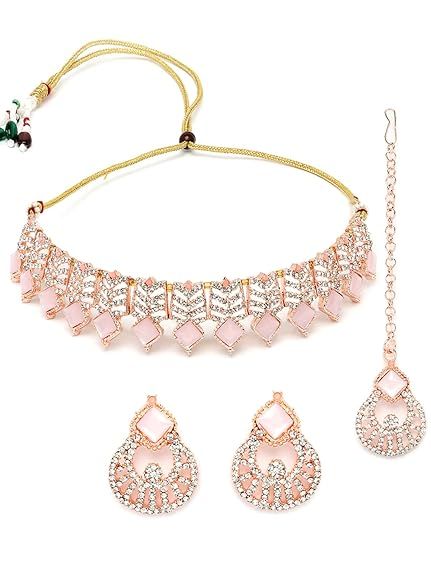


Detected labels (sorted by confidence):
Body jewelry  (score: 0.89 )
Natural material  (score: 0.88 )
Amber  (score: 0.85 )
Creative arts  (score: 0.85 )
Material property  (score: 0.8 )
Necklace  (score: 0.79 )
Jewellery  (score: 0.76 )
Jewelry making  (score: 0.76 )
Art  (score: 0.74 )
Fashion design  (score: 0.74 )


In [ ]:
from IPython.display import Image, display
def get_sorted_labels(image_path):
    labels = detect_labels(image_path)
    sorted_labels = sorted(labels, key=lambda lbl: lbl.score, reverse=True)  # Sort by confidence score

    # Display the image
    print("Displaying image:")
    display(Image(filename=image_path))

    # Display sorted labels
    print("\nDetected labels (sorted by confidence):")
    for label in sorted_labels:
        print(label.description, ' (score:', round(label.score, 2), ')')



# Replace with the path to your image
image_path = '/content/71A1uqwKSdL._SY575_.jpg'  # Update with the path to the image you want to analyze
get_sorted_labels(image_path)


## Vertex AI AutoML Trained Image Classifier

In [1]:
!pip install google-cloud-aiplatform


In [1]:
from google.cloud import aiplatform


In [2]:
import os
#Get the key of the service account after providing "AI Platform Admin"
#Add these roles also just incase - Owner, Vertex AI Administrator, Vertex AI Service Agent
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/healthy-sign-407612-463bfcc04dce.json"

In [3]:
import base64
def predict_image_classification_sample(
    project: str,
    endpoint_id: str,
    location: str,
    filename: str,
):
    aiplatform.init(project=project, location=location)

    with open(filename, "rb") as f:
        file_content = f.read()
        #print(file_content)
        encoded_content = base64.b64encode(file_content)
        #print("conents : ",encoded_content)
        # If you want to print or work with the encoded content as a string
        encoded_string = encoded_content.decode('utf-8') # - Without encoding it says that request is too long
        #print("string",encoded_string)

    endpoint = aiplatform.Endpoint(endpoint_id)

    response = endpoint.predict(instances=[{"content": encoded_string}])
    print("prediction response")
    print(" deployed_model_id:", response.deployed_model_id)
    # See gs://google-cloud-aiplatform/schema/predict/prediction/predictions_schema.json for the format of the predictions.
    predictions = response.predictions
    for prediction in predictions:
        print(" prediction:", dict(prediction))


In [4]:
#Can obtain these details from the sample API Request python tab in the deploy section of the model
PROJECT_ID = "************"  # Replace with your project ID
ENDPOINT_ID = "************"  # Replace with your endpoint ID
LOCATION = "************" # Replace with your location
FILENAME = "************"  # Replace with the path to your image file - File has to be small otherwise you might get error (Request is too long)

Displaying image:


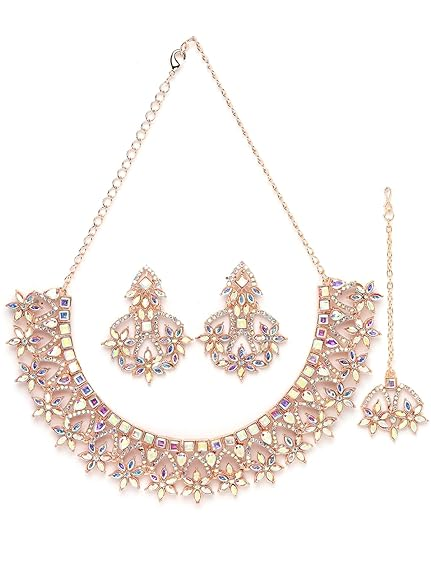

prediction response
 deployed_model_id: 1528380536236539904
 prediction: {'ids': ['2996719216381394944', '850753993939353600', '2658949244328607744'], 'displayNames': ['Ring', 'Bracelet', 'Necklace'], 'confidences': [0.00167312729, 0.0248927847, 0.973434091]}


In [6]:
from IPython.display import Image, display
# Display the image
print("Displaying image:")
display(Image(filename=FILENAME))
predict_image_classification_sample(
    project=PROJECT_ID,
    endpoint_id=ENDPOINT_ID,
    location=LOCATION,
    filename=FILENAME
)
